In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy.stats import linregress
from scipy.stats import theilslopes
import pymannkendall as mk

import pickle

%matplotlib inline
plt.rcParams.update({
    'font.family': 'Arial',
    'font.sans-serif': ['Arial'],
    'font.size': 11})

In [2]:
MDA8 = pd.read_csv("C:\\Users\\marsavin\\Desktop\\CAVE2021\\AQS\\2007_2023_merged\\2007_2023_MDA8.csv",
                  parse_dates=['datetime'], index_col='datetime')

MDA1 = pd.read_csv("C:\\Users\\marsavin\\Desktop\\CAVE2021\\AQS\\2007_2023_merged\\2007_2023_MDA1.csv",
                  parse_dates=['datetime'], index_col='datetime')

#isolate the warm season (WS; May-September) data
WS_MDA8 = MDA8[(MDA8.index.month >= 5) & (MDA8.index.month <= 9)]
WS_MDA8 = WS_MDA8.reindex(MDA8.index, fill_value=np.nan)
WS_MDA1 = MDA1[(MDA1.index.month >= 5) & (MDA1.index.month <= 9)]
WS_MDA1 = WS_MDA1.reindex(MDA1.index, fill_value=np.nan)

In [28]:
#define some plotting functions

def plot_timeseries(df, ylabel, percentile):

    fig, ax = plt.subplots(5,1, figsize = (7, 8))

    sites = ['PALO', 'HOBBS', 'CCLM', 'CAVE', 'BIBE']

    for i, site in enumerate(sites):

        ax[i].plot(df[site], label=site, alpha=0.5, lw=.75, color='gray', zorder=0)

        x = df.index.year.unique()
        y = df.resample('Y').quantile(percentile)[site].values

        mask = ~np.isnan(x) & ~np.isnan(y)
        slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])

        ax[i].scatter(df.resample('Y').mean().index-pd.Timedelta(days=365/2), y, color='k', marker='s', zorder=1)
        ax[i].plot(df.resample('Y').mean().index-pd.Timedelta(days=365/2), (slope)*x+intercept, zorder=0.5, lw=1, color='b')

        if p_value < 0.001:
            ax[i].annotate(f'{percentile:.2f}'.lstrip('0.') + r'$^{\rm th}$ %ile trend: ' + f'{slope:.2f} ± {std_err:.2f} ppbv'+' yr$^{-1}$'+f'   $R^2 = {r_value**2:.2f}$  $P$ = <0.001',
                           xy=(0.125, 0.85), xycoords='axes fraction', color='b', fontsize=10)
        else:
            ax[i].annotate(f'{percentile:.2f}'.lstrip('0.') + r'$^{\rm th}$ %ile trend: ' + f'{slope:.2f} ± {std_err:.2f} ppbv'+' yr$^{-1}$'+f'   $R^2 = {r_value**2:.2f}$   $P$ = {p_value:.3f}',
                           xy=(0.125, 0.85), xycoords='axes fraction', color='b', fontsize=10)
    

    for i in range(len(ax)):
        ax[i].set_ylim(0,130)
        ax[i].set_yticks([20, 40, 60, 80, 100])
        ax[i].set_xlim(pd.to_datetime('2007-01-01'), pd.to_datetime('2022-01-01'))
        ax[i].set_xticks(pd.date_range('2007-01-01', '2022-01-01', freq='Y')-pd.Timedelta(days=364))
        ax[i].hlines(70, xmin=df.index[0], xmax=df.index[-1],
                    color='r', zorder=0, ls='--', lw=0.75)
        ax[i].annotate(sites[i], xy=(0.01, 0.85), xycoords='axes fraction', fontweight='bold')
        ax[i].grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')

    for i in np.arange(0,4):
        ax[i].set_xticklabels([])
        ax[i].grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')
        for tick in ax[i].xaxis.get_major_ticks():
            tick.tick1line.set_visible(False)

    ax[2].set_ylabel(ylabel)

    ax[0].spines[['top','bottom','right']].set_visible(False)
    ax[1].spines[['top','bottom','right']].set_visible(False)
    ax[2].spines[['top','bottom','right']].set_visible(False)
    ax[3].spines[['top','bottom','right']].set_visible(False)
    ax[4].spines[['top','right']].set_visible(False)

    for i, tick in enumerate(ax[-1].xaxis.get_major_ticks()):
        if i % 2 == 1 and i < len(ax[-1].xaxis.get_major_ticks()) - 1:
            tick.label.set_visible(False)

    ax[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


In [9]:
WS_MDA8[WS_MDA8.index.year < 2022]

,PALO,HOBBS,CCLM,CAVE,BIBE
datetime,,,,,
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN
2007-01-04,NaN,NaN,NaN,NaN,NaN
2007-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2021-12-27,NaN,NaN,NaN,NaN,NaN
2021-12-28,NaN,NaN,NaN,NaN,NaN
2021-12-29,NaN,NaN,NaN,NaN,NaN


C:\Users\marsavin\AppData\Local\Temp\ipykernel_19948\2737667476.py:56: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_visible(False)


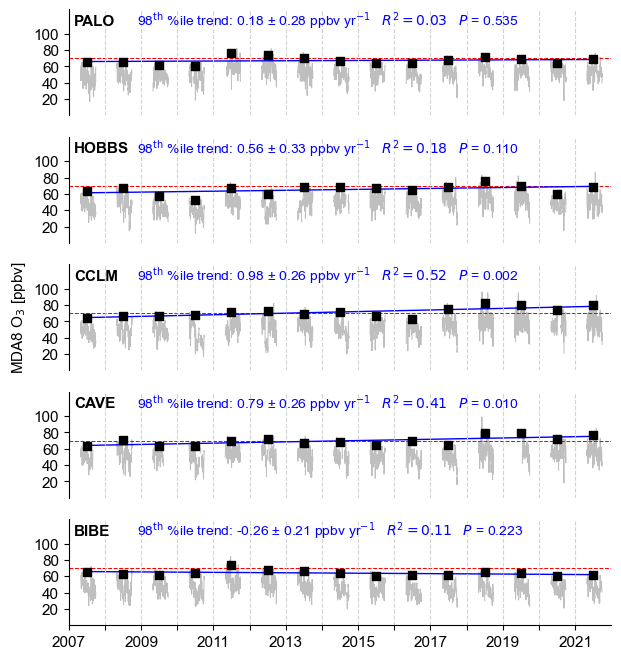

In [30]:
plot_timeseries(WS_MDA8[WS_MDA8.index.year < 2022], 'MDA8 O$_3$ [ppbv]', 0.98)
#plt.savefig("C:\\Users\\marsavin\\Desktop\\CAVE2021\\prelim_plots\\NPS_presentation\\MDA8_LLS_2007_2021.png", dpi=300, bbox_inches='tight')

C:\Users\marsavin\AppData\Local\Temp\ipykernel_19948\2373573389.py:51: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_visible(False)


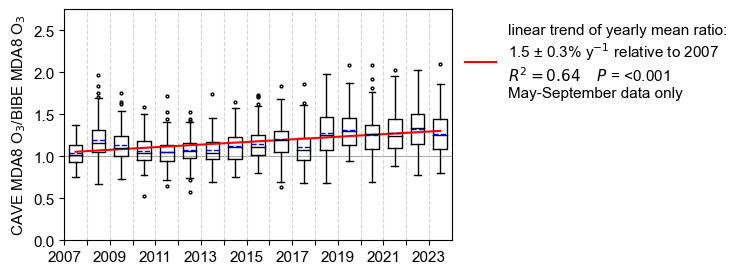

In [6]:
BIBE_by_year = {}
for year, data in WS_MDA8['BIBE'].groupby(WS_MDA8.index.year):
    BIBE_by_year[year] = data

CAVE_by_year = {}
for year, data in WS_MDA8['CAVE'].groupby(WS_MDA8.index.year):
    CAVE_by_year[year] = data

years = WS_MDA8.index.year.unique()
slopes = []
r_values = []
ratios = []
mean_ratios = []
for i, year in enumerate(years):
    x = BIBE_by_year[year].dropna()
    y = CAVE_by_year[year].dropna()
    mask = ~np.isnan(x) & ~np.isnan(y)

    slope, intercept, r_value, p_value, std_err = linregress(x[mask], y[mask])
    slopes.append(slope)
    r_values.append(r_value)

    ratios.append((y[mask]/x[mask]))
    mean_ratios.append((y[mask]/x[mask]).mean())

fig, ax = plt.subplots(1,1, figsize = (5, 3))#, sharey=True)

d = []
for i, year in enumerate(years):
    d.append(ratios[i].values)

ax.boxplot(d, positions=years+.5,
           showmeans=True, showfliers=True, meanline=True, medianprops={'linewidth': 1, 'color': 'k'},
           meanprops={'linewidth': 1, 'color': 'blue'}, widths=0.6,
           flierprops={'markersize': 2})   

x = years
y = mean_ratios
slope, intercept, r_value, p_value, std_err = linregress(x, y)
ax.plot(years+.5, slope*(years+.5)+intercept, color='r', 
        label=f'linear trend of yearly mean ratio:\n' + f'{slope/mean_ratios[0]*100:.1f} ± {std_err/mean_ratios[0]*100:.1f}' + '% y$^{-1}$ relative to 2007\n' +f'$R^2 = {r_value**2:.2f}$    $P$ = <0.001\nMay-September data only')
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1,1))

ax.set_ylim(0., 2.75)
ax.grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')

ax.set_xticks(years, labels=years)
ax.set_ylabel('CAVE MDA8 O$_3$/BIBE MDA8 O$_3$')
for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i % 2 == 1 and i < len(ax.xaxis.get_major_ticks()) - 1:
        tick.label.set_visible(False)

ax.hlines(xmin=2007, xmax=2024, y=1, ls='-', lw=0.5, color='gray', zorder=-1)

plt.show()


In [7]:
std_err/mean_ratios[0]*100

0.2887990752489345

In [8]:
mean_ratios

[1.0373039555459953,
 1.1933082923904865,
 1.1287230775413681,
 1.0676943937187342,
 1.0484156695724518,
 1.0753034168540934,
 1.07310580005987,
 1.117922229821714,
 1.1477243523738068,
 1.2010349635461055,
 1.104920662629786,
 1.2743642009603837,
 1.3093199912126035,
 1.2512980092529384,
 1.2792084657705631,
 1.3242100782164679,
 1.2628390209264246]

In [192]:
print(f'mean CAVE/BIBE MDA8 O3 ratio May-Sept 2007-2017: {np.mean(mean_ratios[:11]):.2f}')
print(f'mean CAVE/BIBE MDA8 O3 ratio May-Sept 2017-2023: {np.mean(mean_ratios[11:]):.2f}')

mean CAVE/BIBE MDA8 O3 ratio May-Sept 2007-2017: 1.11
mean CAVE/BIBE MDA8 O3 ratio May-Sept 2017-2023: 1.28


C:\Users\marsavin\AppData\Local\Temp\ipykernel_10284\942806915.py:31: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_visible(False)


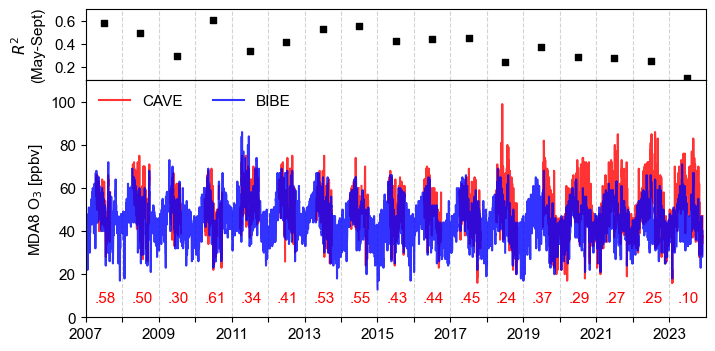

In [9]:
fig, ax= plt.subplots(2,1, figsize = (8, 4), height_ratios=[0.3, 1], sharex=True)

r2_values = np.array(r_values)**2
ax[0].scatter(MDA8.resample('Y').mean().index-pd.Timedelta(days=365/2), r2_values, marker='s', color='k', s=20)
ax[0].set_ylim(0.08, 0.7)
ax[0].set_yticks([0.2, 0.4, 0.6])
ax[0].set_ylabel('$R^2$\n(May-Sept)')

ax[1].plot(MDA8.CAVE, label='CAVE', alpha=0.8, color='r')
ax[1].plot(MDA8.BIBE, label='BIBE', alpha=0.8, color='b')

ax[1].set_xlim(pd.to_datetime('2007-01-01'), pd.to_datetime('2024-01-01'))
ax[1].set_xticks(pd.date_range('2007-01-01', '2024-01-01', freq='Y')-pd.Timedelta(days=364))

for i, value in enumerate(r2_values):
    x_pos = 0.015 + i * 0.05875
    ax[1].annotate(f'{value:.2f}'.lstrip('0'), xy=(x_pos, 0.065), xycoords='axes fraction', c='r')
                #bbox=dict(facecolor='white', alpha=0.9, edgecolor='white'))

# tax[1]=ax[1].twinx()
# tax[1].scatter(MDA8.resample('Y').mean().index-pd.Timedelta(days=365/2), r2_values)
# tax[1].set_ylim(0, 3)

ax[0].grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')
ax[1].grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')
ax[1].set_ylabel('MDA8 O$_3$ [ppbv]')
ax[1].set_ylim(0,110)

for i, tick in enumerate(ax[1].xaxis.get_major_ticks()):
    if i % 2 == 1 and i < len(ax[1].xaxis.get_major_ticks()) - 1:
        tick.label.set_visible(False)

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].legend(frameon=False, ncols=2, loc='upper left')

# ax[0].spines[['bottom']].set_visible(False)
# ax[1].spines[['top']].set_visible(False)

plt.subplots_adjust(hspace=0.)
fig.align_ylabels()

C:\Users\marsavin\AppData\Local\Temp\ipykernel_19948\4089155483.py:26: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_visible(False)


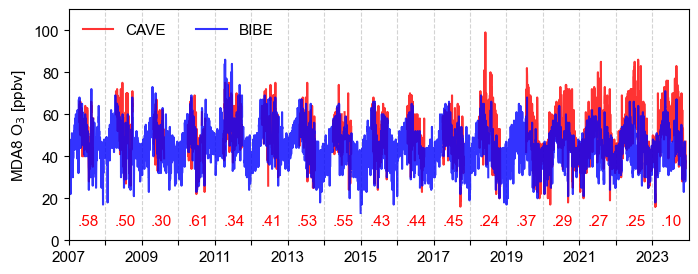

In [9]:
fig, ax= plt.subplots(1,1, figsize = (8, 3))#, height_ratios=[0.3, 1], sharex=True)

r2_values = np.array(r_values)**2

ax.plot(MDA8.CAVE, label='CAVE', alpha=0.8, color='r')
ax.plot(MDA8.BIBE, label='BIBE', alpha=0.8, color='b')

ax.set_xlim(pd.to_datetime('2007-01-01'), pd.to_datetime('2024-01-01'))
ax.set_xticks(pd.date_range('2007-01-01', '2024-01-01', freq='Y')-pd.Timedelta(days=364))

for i, value in enumerate(r2_values):
    x_pos = 0.015 + i * 0.05875
    ax.annotate(f'{value:.2f}'.lstrip('0'), xy=(x_pos, 0.065), xycoords='axes fraction', c='r')
                #bbox=dict(facecolor='white', alpha=0.9, edgecolor='white'))

# tax=ax.twinx()
# tax.scatter(MDA8.resample('Y').mean().index-pd.Timedelta(days=365/2), r2_values)
# tax.set_ylim(0, 3)

ax.grid(True, which='both', axis='x', linestyle='dashed', c='lightgray')
ax.set_ylabel('MDA8 O$_3$ [ppbv]')
ax.set_ylim(0,110)

for i, tick in enumerate(ax.xaxis.get_major_ticks()):
    if i % 2 == 1 and i < len(ax.xaxis.get_major_ticks()) - 1:
        tick.label.set_visible(False)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend(frameon=False, ncols=2, loc='upper left')

# ax[0].spines[['bottom']].set_visible(False)
# ax.spines[['top']].set_visible(False)

plt.subplots_adjust(hspace=0.)
fig.align_ylabels()
plt.savefig("C:\\Users\\marsavin\\Desktop\\CAVE2021\\prelim_plots\\BIBEvCAVE.png", dpi=300, bbox_inches='tight')